<a href="https://colab.research.google.com/github/Prianjali14/CodSoft/blob/main/recommendationModel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pickle

In [205]:
# Load Myntra dataset
myntra = pd.read_csv('myntra_excel.csv')

In [206]:
myntra.shape

(15000, 26)

In [207]:
# Remove duplicate entries based on title from myntra
myntra  = myntra.drop_duplicates(subset=['title'])
myntra.shape

(11250, 26)

In [208]:
myntra

,uniq_id,crawl_timestamp,product_id,link,size,variant_sku,brand,care_instructions,dominant_material,title,...,size_fit,complete_the_look,type,variant_price,variant_compare_at_price,ideal_for,is_in_stock,inventory,specifications,Unnamed: 25
0,cc51c3dd925d9d84e2fb28c7918dbbc3,2019-08-11 05:49:46 +0000,6937673,https://www.myntra.com/tops/imara/imara-women-...,XL,6937673_XL,IMARA,Polyester | Dry-clean,Polyester,IMARA Women Black Solid Top,...,"The model (height 5'8"") is wearing a size S",Improve your personal style with a brand new t...,Clothing/Women/Tops/IMARA/More by IMARA,959,1599,Women,Out of Stock,0,Transparency : Opaque | Sleeve Styling : Bell ...,NaN
1,c7e2fe388a93dae5c86b50dd8a5dbd7a,2019-07-03 01:04:34 +0000,7441182,https://www.myntra.com/kurtas/house-of-pataudi...,XL,7441182_XL,House of Pataudi,100% cottonMachine-wash,cotton,House of Pataudi Men Black Printed Straight Kurta,...,The model (height 6') is wearing a size M,"From House of Pataudi, this kurta is a great w...",Clothing/Men/Kurtas/House of Pataudi/More by H...,799,1999,Men,In Stock,Shape : Straight | Sleeve Styling : Regular Sl...,NaN,NaN
2,76949d78057a633aace6246045eefd66,2019-07-15 09:43:31 +0000,9245141,https://www.myntra.com/pillows/the-white-willo...,S,9245141_S,The White Willow,Polycotton | Only spot clean by hand with warm...,Cotton,The White Willow Unisex Off-White Therapedic M...,...,Dimensions: 58.42 cm x 33.02 cm x 10.16 cm,The White Willow has been founded with the vis...,Home/Unisex/Pillows/The White Willow/More by T...,1399,2799,Unisex,In Stock,Number of Components : 1 | Material : Polycott...,NaN,NaN
3,5f83f6b51da1ef93bc0585577b6991e6,2019-07-15 14:11:14 +0000,1314889,https://www.myntra.com/dupatta/dupatta-bazaar/...,Onesize,1314889_Onesize,Dupatta Bazaar,Chiffon | Hand-wash,Chiffon,Dupatta Bazaar Pink Dupatta,...,Length: 2.3 metres Width: 1.1 metres,Complement your ethnic ensemble with this dupa...,Clothing/Women/Dupatta/Dupatta Bazaar/More by ...,349,499,Women,In Stock,Pattern : Solid | Occasion : Daily | Border : ...,NaN,NaN
4,890bf4355c319a4211296b9d3176d11f,2019-06-01 08:17:28 +0000,7705322,https://www.myntra.com/kurta-sets/manyavar/man...,S,7705322_S,Manyavar,Top fabric: Silk Blend | Bottom fabric: Silk B...,Silk,Manyavar Men Yellow & White Self Design Kurta ...,...,The model (height 6') is wearing a size M,"From Manyavar, this kurta is a great way to sh...",Clothing/Men/Kurta Sets/Manyavar/More by Manyavar,2999,2999,Men,Out of Stock,Occasion : Festive | Number of Components : 2 ...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,65cd8b64bac9149ae6376fc9f0291b85,2019-08-19 03:44:04 +0000,2366741,https://www.myntra.com/2366741,M,2366741_M,Shree,100% LivaHand-wash,Liva,Shree Women Grey & Red Floral Print Maxi Dress,...,"Semi-Fit The model (height 5'8"") is wearing a...",This timeless and sumptuous Shree dress is sui...,Clothing/Women/Dresses/Shree/More by Shree,764,1699,Women,Out of Stock,0,Knit or Woven : Woven | Transparency : Opaque ...,NaN
14994,fa6d9090467edc3dc0706e6c66707bd1,2019-08-19 07:01:59 +0000,6554346,https://www.myntra.com/6554346,XL,6554346_XL,Freehand,Top fabric: Pure Cotton | Bottom fabric: Pure ...,Cotton,Freehand Men Red & White Self-Design Kurta wit...,...,The model (height 6') is wearing a size M,This in-style kurta from Freehand is a must-ha...,Clothing/Men/Kurta Sets/Freehand/More by Freehand,919,2299,Men,Out of Stock,0,Occasion : Daily | Number of Components : 2 | ...,NaN
14996,d42876ac4e79f4f8eafce06f42b83c4e,2019-08-19 15:55:34 +0000,5504617,https://www.myntra.com/kurtas/shakumbhari/shak...,XXL,5504617_XXL,Shakumbhari,Cotton | Machine-wash,Cotton,Shakumbhari Women Pink Embroidered A-Line Kurta,...,"The model (height 5'8"") is wearing a size S",Make a statement with this elegant kurta from ...,Clothing/Women/Kurtas/Shakumbhari/More by Shak...,627,1395,Women,Out of Stock,0,Shape : A-Line | Business Unit : Apparel | Sle...,https://www.myntra.com/shakumbhari
14997,b

In [209]:
# After removing duplicate values, Reset index of database
myntra.reset_index(drop=True, inplace = True)

In [210]:
# All the features of the dataset
features = myntra.columns
print(features)

Index(['uniq_id', 'crawl_timestamp', 'product_id', 'link', 'size',
       'variant_sku', 'brand', 'care_instructions', 'dominant_material',
       'title', 'actual_color', 'dominant_color', 'product_type', 'images',
       'body', 'product_details', 'size_fit', 'complete_the_look', 'type',
       'variant_price', 'variant_compare_at_price', 'ideal_for', 'is_in_stock',
       'inventory', 'specifications', 'Unnamed: 25'],
      dtype='object')


In [211]:
# To check if the dataset has any null values or not
myntra.isnull().sum()

uniq_id                         0
crawl_timestamp                 0
product_id                      0
link                            0
size                            0
variant_sku                     0
brand                           0
care_instructions              20
dominant_material             431
title                           0
actual_color                  784
dominant_color                790
product_type                 1200
images                          0
body                            0
product_details                 0
size_fit                     1007
complete_the_look             176
type                            0
variant_price                   0
variant_compare_at_price        0
ideal_for                       0
is_in_stock                     0
inventory                      93
specifications               4327
Unnamed: 25                 10812
dtype: int64

In [212]:
# First row
myntra.loc[0]

uniq_id                                      cc51c3dd925d9d84e2fb28c7918dbbc3
crawl_timestamp                                     2019-08-11 05:49:46 +0000
product_id                                                            6937673
link                        https://www.myntra.com/tops/imara/imara-women-...
size                                                                       XL
variant_sku                                                        6937673_XL
brand                                                                   IMARA
care_instructions                                       Polyester | Dry-clean
dominant_material                                                   Polyester
title                                             IMARA Women Black Solid Top
actual_color                                                            Black
dominant_color                                                          Black
product_type                                                    

In [213]:
myntra['product_id'].value_counts()

product_id
9792639     2
9539307     2
9196975     2
6937673     1
2526069     1
           ..
6698831     1
2120034     1
10024859    1
7648500     1
2012151     1
Name: count, Length: 11247, dtype: int64

In [214]:
# Drop duplicate products based on product_id
myntra = myntra.drop_duplicates(subset = ["product_id"])
myntra.shape

(11247, 26)

In [215]:
# No duplicate entries available based on product_id
myntra['product_id'].value_counts()

product_id
6937673     1
1619876     1
2526069     1
10222929    1
8500699     1
           ..
2684781     1
6698831     1
2120034     1
10024859    1
2012151     1
Name: count, Length: 11247, dtype: int64

In [216]:

myntra['ideal_for'].value_counts()

ideal_for
Women     7000
Men       2741
Unisex     546
Girls      534
Boys       426
Name: count, dtype: int64

<Axes: xlabel='ideal_for', ylabel='count'>

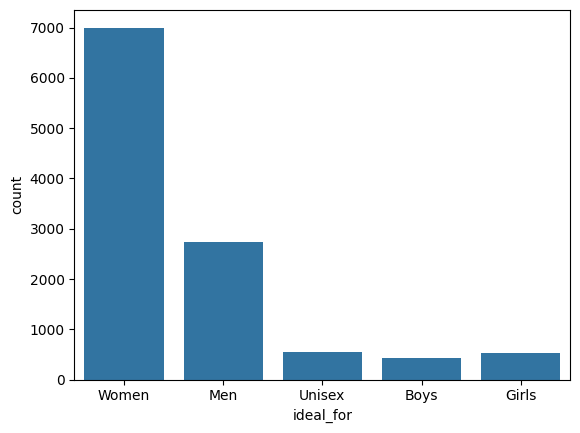

In [217]:
sns.countplot(x = 'ideal_for', data = myntra)

In [218]:
myntra['brand'].value_counts()

brand
Anouk                    1158
Biba                      832
Libas                     607
Shree                     560
Global Desi               523
                         ... 
JADE BLUE                   1
Boutique Living India       1
Citypret                    1
Toshee                      1
AASK                        1
Name: count, Length: 364, dtype: int64

<Axes: xlabel='brand'>

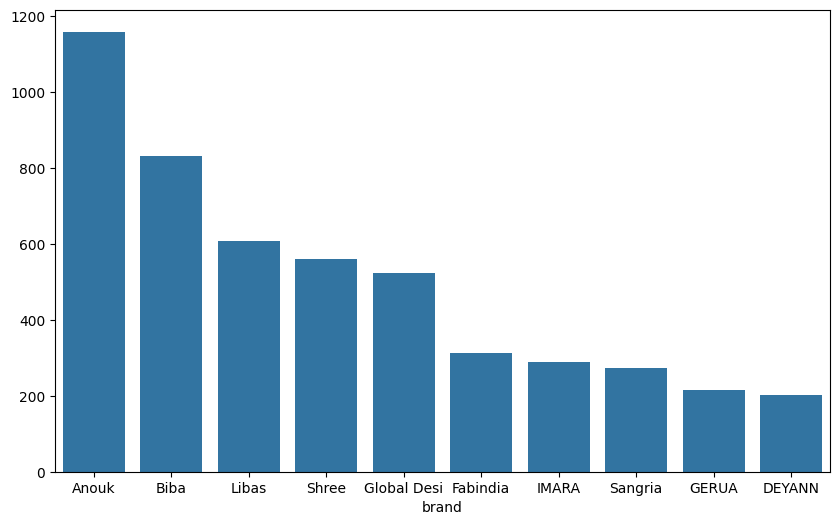

In [219]:
# Top 10 brands bard plot
plt.figure(figsize=(10,6))
sns.barplot(x = myntra['brand'].value_counts().index[0:10] , y = myntra['brand'].value_counts().values[0:10] )

In [220]:
Top_Brands = dict(myntra['brand'].value_counts()[0: 20])
print(Top_Brands)

{'Anouk': 1158, 'Biba': 832, 'Libas': 607, 'Shree': 560, 'Global Desi': 523, 'Fabindia': 312, 'IMARA': 288, 'Sangria': 272, 'GERUA': 214, 'DEYANN': 202, 'AKS': 200, 'SOJANYA': 182, 'Rangriti': 180, 'Inddus': 176, 'INDYA': 174, 'KISAH': 154, 'VASTRAMAY': 154, 'even': 140, 'Aj DEZInES': 128, 'Freehand': 128}


In [221]:
myntra['inventory'][0]

'0'

In [222]:
myntra['inventory'][1]

'Shape : Straight | Sleeve Styling : Regular Sleeves | Occasion : Daily | Print or Pattern Type : Geometric | Number of Components : 1 | Design Styling : Regular | Colour Family : Monochrome | Neck : Mandarin Collar | Pattern : Printed | Body or Garment Size : Garment Measurements in | Sleeve Length : Long Sleeves | Weave Pattern : Regular | Fabric Purity : Pure | Stitch : Ready to Wear | Hemline : Straight | Wash Care : Machine Wash | Weave Type : Machine Weave | Length : Knee Length | Slit Detail : Side Slits | Fabric : Cotton'

In [223]:
# Firstly Fill every null values with ""
myntra['inventory'].fillna("", inplace = True)

# If string has length less than 2 = replace it with " " in inventory
def updateInventory(x):
    if(len(x) < 2):
        x = " "
    return x
myntra['inventory'] = myntra['inventory'].apply(updateInventory)


myntra['inventory']


<ipython-input-223-4d5dfb9fb24e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myntra['inventory'].fillna("", inplace = True)
<ipython-input-223-4d5dfb9fb24e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myntra['inventory'] = myntra['inventory'].apply(updateInventory)


0                                                         
1        Shape : Straight | Sleeve Styling : Regular Sl...
2        Number of Components : 1 | Material : Polycott...
3        Pattern : Solid | Occasion : Daily | Border : ...
4        Occasion : Festive | Number of Components : 2 ...
                               ...                        
11245                                                     
11246                                                     
11247                                                     
11248                                                     
11249                                                     
Name: inventory, Length: 11247, dtype: object

In [224]:

# Split the string and then replace all numvers and regular expressions with " " and return preprocessed string which can bes used in model training
def preprocessInventory(x):

    ls = x.split(" | ")

    str = " ".join(ls)
    cleanString = re.sub('\W+',' ', str ).strip()

    return cleanString.lower()


myntra['Pre_Inventory'] = myntra['inventory'].apply(preprocessInventory)

myntra['Pre_Inventory']

<ipython-input-224-1f97981ab81a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myntra['Pre_Inventory'] = myntra['inventory'].apply(preprocessInventory)


0                                                         
1        shape straight sleeve styling regular sleeves ...
2        number of components 1 material polycotton set...
3                pattern solid occasion daily border solid
4        occasion festive number of components 2 top pa...
                               ...                        
11245                                                     
11246                                                     
11247                                                     
11248                                                     
11249                                                     
Name: Pre_Inventory, Length: 11247, dtype: object

In [225]:
myntra['type'][0]

'Clothing/Women/Tops/IMARA/More by IMARA'

In [226]:
# for getting all values separated by "/" and use it into model
def preprocessType(x):
    ls = x.split("/")
    str = ' '.join(ls).strip()
    return str.lower()


myntra['type'] = myntra['type'].apply(preprocessType)

<ipython-input-226-3747713cadab>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myntra['type'] = myntra['type'].apply(preprocessType)


In [227]:
myntra['type'][0: 5]

0              clothing women tops imara more by imara
1    clothing men kurtas house of pataudi more by h...
2    home unisex pillows the white willow more by t...
3    clothing women dupatta dupatta bazaar more by ...
4    clothing men kurta sets manyavar more by manyavar
Name: type, dtype: object

In [228]:
myntra['body'][1]

"Black printed straight kurta, has a mandarin collar, long sleeves, straight hem, side slits and two pockets\nThe model (height 6') is wearing a size M\nFrom House of Pataudi, this kurta is a great way to show off your style.  Dress this black piece up with your favourite accessories and head out to any family event in style.\n100% cottonMachine-wash"

In [229]:
# Remove numbers and regular expressions from the string and preprocess it

def preproceBody(X):


    cleanString = re.sub(r"[^A-Za-z]+",' ', X )

    return cleanString.lower()

myntra['preprocess_body'] = myntra['body'].apply(preproceBody)
myntra['preprocess_body'][0]

<ipython-input-229-f9538af298e6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myntra['preprocess_body'] = myntra['body'].apply(preproceBody)


'black solid woven regular top has a v neck three quarter sleeves an attached lining the model height is wearing a size s improve your personal style with a brand new three quarter sleeve top designed by imara when you want to have the perfect outfit for a fun lunch with the girls you ll want to put this black piece with an ankle boot and tapered leg pants polyester dry clean'

In [230]:
# Fill evenry null values with ""
myntra['care_instructions'].fillna("", inplace=True )
myntra['care_instructions'].isnull().sum()


<ipython-input-230-daea43cfd13d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myntra['care_instructions'].fillna("", inplace=True )


0

In [231]:
myntra['dominant_material'].fillna('', inplace = True)
myntra['dominant_color'].fillna("", inplace=True)
myntra['actual_color'].fillna("", inplace=True)
print(myntra['dominant_material'].isnull().sum())
print(myntra['dominant_color'].isnull().sum())
print(myntra['actual_color'].isnull().sum())

0
0
0


<ipython-input-231-040f184ea545>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myntra['dominant_material'].fillna('', inplace = True)
<ipython-input-231-040f184ea545>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myntra['dominant_color'].fillna("", inplace=True)
<ipython-input-231-040f184ea545>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myntra['actual_color'].fillna("", inplace=True)


In [232]:
# Multiple images are there so covert them into list
def image_process(x):
    x = x.split(" | ")

    return x

In [233]:

myntra['images'] = myntra['images'].apply(image_process)
myntra['images']

<ipython-input-233-68363c863d2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myntra['images'] = myntra['images'].apply(image_process)


0        [http://assets.myntassets.com/v1/assets/images...
1        [http://assets.myntassets.com/v1/assets/images...
2        [http://assets.myntassets.com/v1/assets/images...
3        [http://assets.myntassets.com/v1/assets/images...
4        [http://assets.myntassets.com/v1/assets/images...
                               ...                        
11245    [http://assets.myntassets.com/v1/assets/images...
11246    [http://assets.myntassets.com/v1/assets/images...
11247    [http://assets.myntassets.com/v1/assets/images...
11248    [http://assets.myntassets.com/v1/assets/images...
11249    [http://assets.myntassets.com/v1/assets/images...
Name: images, Length: 11247, dtype: object

In [234]:
# remove all data with less than 4 images
myntra = myntra[myntra['images'].apply(lambda x : len(x) > 3)]

In [235]:
myntra['specifications'].fillna("" , inplace = True)

<ipython-input-235-a3ca089199df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myntra['specifications'].fillna("" , inplace = True)


In [236]:
# Preprocessing
def preprocessCareInstruction(x):
    x = x.replace(u'\xa0', u' ')
    x = x.replace('-', '')


    ls = x.split(" | ")

    str = " ".join(ls)
    cleanString = re.sub('\W+',' ', str ).strip()

    return cleanString.lower()


myntra['care_instructions'] = myntra['care_instructions'].apply(preprocessCareInstruction)

myntra['care_instructions'][12]

<ipython-input-236-036033fb4f92>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myntra['care_instructions'] = myntra['care_instructions'].apply(preprocessCareInstruction)


'top fabric tussar silk bottom fabric tussar silk handwash'

In [237]:
myntra.head()

,uniq_id,crawl_timestamp,product_id,link,size,variant_sku,brand,care_instructions,dominant_material,title,...,type,variant_price,variant_compare_at_price,ideal_for,is_in_stock,inventory,specifications,Unnamed: 25,Pre_Inventory,preprocess_body
0,cc51c3dd925d9d84e2fb28c7918dbbc3,2019-08-11 05:49:46 +0000,6937673,https://www.myntra.com/tops/imara/imara-women-...,XL,6937673_XL,IMARA,polyester dryclean,Polyester,IMARA Women Black Solid Top,...,clothing women tops imara more by imara,959,1599,Women,Out of Stock,,Transparency : Opaque | Sleeve Styling : Bell ...,NaN,,black solid woven regular top has a v neck thr...
1,c7e2fe388a93dae5c86b50dd8a5dbd7a,2019-07-03 01:04:34 +0000,7441182,https://www.myntra.com/kurtas/house-of-pataudi...,XL,7441182_XL,House of Pataudi,100 cottonmachinewash,cotton,House of Pataudi Men Black Printed Straight Kurta,...,clothing men kurtas house of pataudi more by h...,799,1999,Men,In Stock,Shape : Straight | Sleeve Styling : Regular Sl...,,NaN,shape straight sleeve styling regular sleeves ...,black printed straight kurta has a mandarin co...
2,76949d78057a633aace6246045eefd66,2019-07-15 09:43:31 +0000,9245141,https://www.myntra.com/pillows/the-white-willo...,S,9245141_S,The White Willow,polycotton only spot clean by hand with warm w...,Cotton,The White Willow Unisex Off-White Therapedic M...,...,home unisex pillows the white willow more by t...,1399,2799,Unisex,In Stock,Number of Components : 1 | Material : Polycott...,,NaN,number of components 1 material polycotton set...,set content pillow colour off white filling me...
5,6cb35dc135630e138f618b455014bf27,2019-07-28 13:03:52 +0000,2160958,https://www.myntra.com/kurta-sets/wintage/wint...,L,2160958_L,Wintage,kurta fabric linen bottom fabric pure cotton d...,Linen,Wintage Men Beige Solid Kurta with Pyjamas,...,clothing men kurta sets wintage more by wintage,979,1399,Men,Out of Stock,,Sleeve Styling : Regular Sleeves | Occasion : ...,NaN,,beige solid kurta with pyjamas beige straight ...
6,07cc95890eb0034fda8c7160a3a5be6d,2019-06-17 05:21:59 +0000,7766518,https://www.myntra.com/skirts/geroo-jaipur/ger...,34,7766518_34,Geroo Jaipur,first wash dry clean than after hand wash,,Geroo Women Green cotton hand block print skirt,...,clothing women skirts geroo jaipur more by ger...,1572,1850,Women,Out of Stock,Knit or Woven : Knitted and Woven | Transparen...,,NaN,knit or woven knitted and woven transparency o...,green coloured free size dabu print cotton ski...


In [238]:
# reset index
myntra.reset_index(drop = True, inplace = True)

In [239]:
# Creating corpus of data for model training

myntra['corpusData'] = myntra['size']+ " "  + myntra['care_instructions']+ " " + myntra['dominant_material']+ " " + myntra['actual_color'] + " " + myntra['dominant_color'] + " " + myntra['product_type']+ " " + myntra['preprocess_body'] + " " + myntra['type'] + " " + myntra['ideal_for'] + " " + myntra['Pre_Inventory']

In [240]:
# Drop Unnecessery column
myntra.drop('Unnamed: 25', axis =1, inplace = True)

In [241]:
# Remove all null values
myntra.dropna(inplace = True)

In [242]:
myntra.shape

(8771, 28)

In [243]:
myntra.reset_index(inplace = True)

In [244]:

# Product_id == index
myntra['product_id'] = myntra['index']


In [245]:
myntra = myntra.drop_duplicates(subset=['title'])
myntra.shape

(8771, 29)

In [246]:
myntra['img1'] = myntra['images'].iloc[1][0]
myntra['img3'] = myntra['images'].iloc[1][0]
myntra['img2'] = myntra['images'].iloc[1][0]
myntra['img4'] = myntra['images'].iloc[1][0]

In [247]:
# Create 4 columns and add product images into it

for i in range(myntra.shape[0]):
    myntra['img1'].iloc[i] = myntra['images'].iloc[i][0]
    myntra['img2'].iloc[i] = myntra['images'].iloc[i][1]
    myntra['img3'].iloc[i] = myntra['images'].iloc[i][2]
    myntra['img4'].iloc[i] = myntra['images'].iloc[i][3]

Streaming output truncated to the last 5000 lines.
<ipython-input-247-ed347938b330>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myntra['img1'].iloc[i] = myntra['images'].iloc[i][0]
<ipython-input-247-ed347938b330>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myntra['img2'].iloc[i] = myntra['images'].iloc[i][1]
<ipython-input-247-ed347938b330>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myntra['img3'].iloc[i] = myntra['ima

In [248]:
myntra.shape

(8771, 33)

In [249]:
myntra.columns

Index(['index', 'uniq_id', 'crawl_timestamp', 'product_id', 'link', 'size',
       'variant_sku', 'brand', 'care_instructions', 'dominant_material',
       'title', 'actual_color', 'dominant_color', 'product_type', 'images',
       'body', 'product_details', 'size_fit', 'complete_the_look', 'type',
       'variant_price', 'variant_compare_at_price', 'ideal_for', 'is_in_stock',
       'inventory', 'specifications', 'Pre_Inventory', 'preprocess_body',
       'corpusData', 'img1', 'img3', 'img2', 'img4'],
      dtype='object')

In [250]:
# Load ratings dataset
ratings = pd.read_csv('ratings.csv')

In [251]:
ratings.shape

(2419078, 4)

In [252]:
ratings.head()

,Unnamed: 0,userId,product_id,Rating
0,0,3269,0,4.30
1,1,4575,0,3.95
2,2,3844,0,3.72
3,3,1260,0,3.98
4,4,5298,0,4.37


In [253]:
# Drop unnecessery column
ratings.drop('Unnamed: 0' , axis =1 , inplace = True)

In [254]:
ratings.head(1)

,userId,product_id,Rating
0,3269,0,4.3


In [255]:
# merge ratings dataset with myntra using product_id
myntra_merge_ratings = ratings.merge(myntra , on="product_id")
myntra_merge_ratings.head(2)

,userId,product_id,Rating,index,uniq_id,crawl_timestamp,link,size,variant_sku,brand,...,is_in_stock,inventory,specifications,Pre_Inventory,preprocess_body,corpusData,img1,img3,img2,img4
0,3269,0,4.30,0,cc51c3dd925d9d84e2fb28c7918dbbc3,2019-08-11 05:49:46 +0000,https://www.myntra.com/tops/imara/imara-women-...,XL,6937673_XL,IMARA,...,Out of Stock,,Transparency : Opaque | Sleeve Styling : Bell ...,,black solid woven regular top has a v neck thr...,XL polyester dryclean Polyester Black Black To...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
1,4575,0,3.95,0,cc51c3dd925d9d84e2fb28c7918dbbc3,2019-08-11 05:49:46 +0000,https://www.myntra.com/tops/imara/imara-women-...,XL,6937673_XL,IMARA,...,Out of Stock,,Transparency : Opaque | Sleeve Styling : Bell ...,,black solid woven regular top has a v neck thr...,XL polyester dryclean Polyester Black Black To...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...


In [256]:
myntra_merge_ratings.shape

(2050568, 35)

In [257]:

# Total Number of counts on each products
ratingCount = (myntra_merge_ratings.groupby(by=['title'])['Rating'].count().reset_index().rename(columns = {'Rating': "TotalCountRating"})[["title", "TotalCountRating"]])

In [258]:
ratingCount

,title,TotalCountRating
0,Global Desi Women Red & Pink Printed Tunic,275
1,Jaipur Kurti Women Blue Printed Maxi Flared S...,299
2,20Dresses Women Black & Blue Printed Maxi Dress,301
3,9rasa Black Block Print Palazzos,279
4,A.T.U.N All Things Uber Nice Girls Mustard Yel...,305
...,...,...
7427,studio rasa Women Navy-Blue & Green Flared Max...,257
7428,studio rasa Yellow & Off-White Handblock Print...,290
7429,trueBrowns Women Navy Blue Solid Maxi Dress,266
7430,trueBrowns Women Peach-Coloured Solid Maxi Dress,310


In [259]:
ratingCount.describe()

,TotalCountRating
count,7432.000000
mean,275.910657
std,16.688340
min,212.000000
25%,265.000000
50%,276.000000
75%,287.000000
max,341.000000


In [260]:

# Average product rating on each product
averageRating = (myntra_merge_ratings.groupby(by=['title'])['Rating'].mean().reset_index().rename(columns = {'Rating': "AverageRatingCount"})[["title", "AverageRatingCount"]])

In [261]:
averageRating

,title,AverageRatingCount
0,Global Desi Women Red & Pink Printed Tunic,4.264145
1,Jaipur Kurti Women Blue Printed Maxi Flared S...,4.192575
2,20Dresses Women Black & Blue Printed Maxi Dress,4.238206
3,9rasa Black Block Print Palazzos,4.215448
4,A.T.U.N All Things Uber Nice Girls Mustard Yel...,4.294393
...,...,...
7427,studio rasa Women Navy-Blue & Green Flared Max...,4.242957
7428,studio rasa Yellow & Off-White Handblock Print...,4.224690
7429,trueBrowns Women Navy Blue Solid Maxi Dress,4.305263
7430,trueBrowns Women Peach-Coloured Solid Maxi Dress,4.236710


In [262]:
# Find all the product index with ratings
tit = ratingCount['title']
# print(tit)
# ind = []
idx = []
for title in tit:

    new_df = myntra[myntra['title'] == title]
    idx.append(new_df.index)


prod_idx = []
for i in idx:
    prod_idx.append(i[0])
len(prod_idx)

7432

In [263]:
# remove all products withour rarings
myntra = myntra.iloc[prod_idx]
myntra.reset_index(drop = True , inplace = True)
myntra

,index,uniq_id,crawl_timestamp,product_id,link,size,variant_sku,brand,care_instructions,dominant_material,...,is_in_stock,inventory,specifications,Pre_Inventory,preprocess_body,corpusData,img1,img3,img2,img4
0,6658,c50c56cf3654d8109e642912d546dba4,2019-08-01 03:12:22 +0000,6658,https://www.myntra.com/tunics/global-desi/-glo...,XS,10247017_XS,Global Desi,100 viscose handwash,viscose,...,Out of Stock,,Occasion : Ethnic | Main Trend : New Basics | ...,,red and pink printed tunic has a round neck th...,XS 100 viscose handwash viscose Pink | Red Red...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
1,476,6cfeb7fef97b591d16d14ce62d0ada8b,2019-08-04 03:37:13 +0000,476,https://www.myntra.com/skirts/jaipur-kurti/-ja...,34,7626019_34,Jaipur Kurti,100 cotton machinewash,cotton,...,In Stock,15,Knit or Woven : Woven | Transparency : Opaque ...,15,blue woven printed maxi flared skirt has an el...,34 100 cotton machinewash cotton Blue Blue Max...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
2,3804,af473e8c6e890f660950468f118a88a2,2019-06-17 12:26:49 +0000,3804,https://www.myntra.com/dresses/20dresses/20dre...,M,8714821_M,20Dresses,viscose rayon machinewash,Viscose Rayon,...,In Stock,Knit or Woven : Woven | Transparency : Opaque ...,,knit or woven woven transparency opaque shape ...,black and blue printed woven maxi dress has a ...,M viscose rayon machinewash Viscose Rayon Blac...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
3,7300,b5ecac0e7dfe7b50942835a19d96e291,2019-08-11 06:35:58 +0000,7300,https://www.myntra.com/palazzos/9rasa/9rasa-bl...,Onesize,1798310_Onesize,9rasa,cotton and viscosehandwash,Cotton,...,Out of Stock,,Pattern : Printed | Transparency : Opaque | Bo...,,black block print mid rise palazzo trousers ha...,Onesize cotton and viscosehandwash Cotton Blac...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
4,3312,76c08ce947ef23186ec22198f6a263ba,2019-07-02 19:01:29 +0000,3312,https://www.myntra.com/lehenga-choli/atun-all-...,1-2Y,2508395_1-2Y,A.T.U.N All Things Uber Nice,100 polyesterdryclean,polyester,...,Out of Stock,Dupatta Fabric : Net | Occasion : Festive | Nu...,,dupatta fabric net occasion festive number of ...,mustard yellow and maroon lehenga choli with d...,1-2Y 100 polyesterdryclean polyester Yellow | ...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,4541,db47d4f0ca9c37b56426a3ec208cb942,2019-08-14 06:23:47 +0000,4541,https://www.myntra.com/6552574,Onesize,6552574_Onesize,studio rasa,polysilk dryclean only,Silk,...,In Stock,10,Knit or Woven : Woven | Transparency : Opaque ...,10,navy blue and green woven flared maxi skirt wi...,Onesize polysilk dryclean only Silk Green Gree...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
7428,3270,694d713920a4955d58b594e9a0542afa,2019-07-15 07:58:11 +0000,3270,https://www.myntra.com/lehenga-choli/studio-ra...,S,8902189_S,studio rasa,semidupion dryclean,Dupion,...,Out of Stock,Occasion : Festive | Number of Components : 2 ...,,occasion festive number of components 2 blouse...,yellow and of

In [264]:

# Remove columns
drop_columns = ['index' , 'crawl_timestamp' , 'uniq_id' , 'variant_sku', 'link'  , 'care_instructions' , 'is_in_stock', 'images', 'size_fit', 'specifications' ]
new_df = myntra.drop(drop_columns, axis = 1)
new_df.head()

,product_id,size,brand,dominant_material,title,actual_color,dominant_color,product_type,body,product_details,...,variant_compare_at_price,ideal_for,inventory,Pre_Inventory,preprocess_body,corpusData,img1,img3,img2,img4
0,6658,XS,Global Desi,viscose,Global Desi Women Red & Pink Printed Tunic,Pink | Red,Red,Tunic,"Red and Pink printed Tunic, has a round neck, ...","Red and Pink printed Tunic, has a round neck, ...",...,1799,Women,,,red and pink printed tunic has a round neck th...,XS 100 viscose handwash viscose Pink | Red Red...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
1,476,34,Jaipur Kurti,cotton,Jaipur Kurti Women Blue Printed Maxi Flared S...,Blue,Blue,Maxi Flared Skirt,"Blue woven printed maxi flared skirt, has an e...","Blue woven printed maxi flared skirt, has an e...",...,2299,Women,15,15,blue woven printed maxi flared skirt has an el...,34 100 cotton machinewash cotton Blue Blue Max...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
2,3804,M,20Dresses,Viscose Rayon,20Dresses Women Black & Blue Printed Maxi Dress,Black | Blue,Black,Maxi Dress,"Black and blue printed woven maxi dress, has a...","Black and blue printed woven maxi dress, has a...",...,1895,Women,Knit or Woven : Woven | Transparency : Opaque ...,knit or woven woven transparency opaque shape ...,black and blue printed woven maxi dress has a ...,M viscose rayon machinewash Viscose Rayon Blac...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
3,7300,Onesize,9rasa,Cotton,9rasa Black Block Print Palazzos,Black,Black,Palazzos,"Black block print mid-rise palazzo trousers, h...","Black block print mid-rise palazzo trousers, h...",...,1299,Women,,,black block print mid rise palazzo trousers ha...,Onesize cotton and viscosehandwash Cotton Blac...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
4,3312,1-2Y,A.T.U.N All Things Uber Nice,polyester,A.T.U.N All Things Uber Nice Girls Mustard Yel...,Yellow | Maroon | Mustard,Mustard,Lehenga Choli with Dupatta,Mustard yellow and maroon lehenga choli with d...,Mustard yellow and maroon lehenga choli with d...,...,2999,Girls,Dupatta Fabric : Net | Occasion : Festive | Nu...,dupatta fabric net occasion festive number of ...,mustard yellow and maroon lehenga choli with d...,1-2Y 100 polyesterdryclean polyester Yellow | ...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...


In [265]:


drop_from_myntra = ['index' , 'crawl_timestamp', 'uniq_id', 'is_in_stock' , 'link', 'variant_sku', 'care_instructions','images', 'size_fit', 'type', 'is_in_stock' , 'Pre_Inventory', 'preprocess_body', 'corpusData' ]
myntra.drop(drop_from_myntra, axis =1 , inplace = True)

<ipython-input-265-f5f926b00a07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myntra.drop(drop_from_myntra, axis =1 , inplace = True)


In [266]:
myntra.shape

(7432, 20)

In [267]:
# Store updated data into myntra.csv file
myntra.to_csv('myntra.csv')

## Popularity based recommendation system

In [268]:
# merge totalRating and average Rating
rating_df = ratingCount.merge(averageRating , on="title" )
rating_df

,title,TotalCountRating,AverageRatingCount
0,Global Desi Women Red & Pink Printed Tunic,275,4.264145
1,Jaipur Kurti Women Blue Printed Maxi Flared S...,299,4.192575
2,20Dresses Women Black & Blue Printed Maxi Dress,301,4.238206
3,9rasa Black Block Print Palazzos,279,4.215448
4,A.T.U.N All Things Uber Nice Girls Mustard Yel...,305,4.294393
...,...,...,...
7427,studio rasa Women Navy-Blue & Green Flared Max...,257,4.242957
7428,studio rasa Yellow & Off-White Handblock Print...,290,4.224690
7429,trueBrowns Women Navy Blue Solid Maxi Dress,266,4.305263
7430,trueBrowns Women Peach-Coloured Solid Maxi Dress,310,4.236710


In [269]:
rating_df.describe()

,TotalCountRating,AverageRatingCount
count,7432.000000,7432.000000
mean,275.910657,4.249761
std,16.688340,0.026041
min,212.000000,4.151503
25%,265.000000,4.232079
50%,276.000000,4.249848
75%,287.000000,4.267152
max,341.000000,4.341514


In [270]:

# Get popular products by query
polular_df = rating_df[rating_df['TotalCountRating'] > 150].sort_values('AverageRatingCount', ascending=False).head(100)
polular_df

,title,TotalCountRating,AverageRatingCount
3152,Global Desi Women White Embroidered Bardot Top,284,4.341514
5512,SOJANYA Men Black & Maroon Solid Kurta with Dh...,296,4.338378
1868,Chhabra 555 Women Navy Blue & Golden Made to M...,283,4.335548
3269,House of Pataudi Men Burgundy Woven Design Str...,254,4.334843
950,Anouk Women Pink Printed Straight Kurta,281,4.333737
...,...,...,...
2154,Dupatta Bazaar Women Red & Gold-Toned Embroide...,266,4.307406
3771,Inddus Red & Navy Blue & Red Solid Unstitched ...,252,4.307341
3370,I Know Men Red Solid Kurta with Churidar,259,4.307336
4875,Melange by Lifestyle Men Olive Green & Gold-Co...,270,4.307333


In [271]:
# Merge popular products with myntra to get whole data
popular_products = polular_df.merge(myntra , on="title")
popular_products

,title,TotalCountRating,AverageRatingCount,product_id,size,brand,dominant_material,actual_color,dominant_color,product_type,...,complete_the_look,variant_price,variant_compare_at_price,ideal_for,inventory,specifications,img1,img3,img2,img4
0,Global Desi Women White Embroidered Bardot Top,284,4.341514,4788,XS,Global Desi,Cotton,White,White,Top,...,Expand your collection of cold-weather staples...,2599,2599,Women,Transparency : Opaque | Sleeve Styling : Bell ...,,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
1,SOJANYA Men Black & Maroon Solid Kurta with Dh...,296,4.338378,4694,XXL,SOJANYA,Cotton,Maroon | Black,Black,Kurta with Dhoti Pants,...,Sport this classic kurta from SOJANYA this sea...,1224,3499,Men,Sleeve Styling : Regular Sleeves | Occasion : ...,,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
2,Chhabra 555 Women Navy Blue & Golden Made to M...,283,4.335548,2249,44/42,Chhabra 555,Silk,Blue | Navy,Navy,Lehenga Choli,...,Grab attention in this elegant made to measure...,5712,11900,Women,,Dupatta Fabric : Net | Occasion : Festive | Nu...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
3,House of Pataudi Men Burgundy Woven Design Str...,254,4.334843,5230,S,House of Pataudi,Polyester,Burgundy,Burgundy,Straight Kurta,...,This in-style kurta from House of Pataudi is a...,1979,3299,Men,14,Shape : Straight | Sleeve Styling : Regular Sl...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
4,Anouk Women Pink Printed Straight Kurta,281,4.333737,719,XXL,Anouk,viscose,Pink,Pink,Straight Kurta,...,This breathable and stylish kurta from Anouk i...,1049,1499,Women,Shape : Straight | Sleeve Styling : Regular Sl...,,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Dupatta Bazaar Women Red & Gold-Toned Embroide...,266,4.307406,151,Onesize,Dupatta Bazaar,Net,Red,Red,Dupatta,...,Enliven your style statement with this appeali...,1199,1499,Women,16,Pattern : Embroidered | Occasion : Party | Pri...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
96,Inddus Red & Navy Blue & Red Solid Unstitched ...,252,4.307341,5639,Onesize,Inddus,Cotton,Red | Blue | Navy,Red,Dress Material,...,This beautifully constructed Inddus dress mate...,1199,3999,Women,Dupatta Fabric : Poly Chiffon | Occasion : Dai...,,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
97,I Know Men Red Solid Kurta with Churidar,259,4.307336,5787,L,I Know,Viscose Rayon,Red,Red,Kurta with Churidar,...,Complete your look with this kurta from I Know...,2399,5999,Men,,Occasion : Festive | Number of Components : 2 ...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
98,Melange by Lifestyle Men Olive Green & Gold-Co...,270,4.307333,1710,XL,Melange by Lifestyle,viscose,Olive | Green,Olive,Straight Kurta,...,"From Melan

In [272]:

# Function for getting popular products based on gender
def getPopularProd( data, gender, myntra):
    data = data[data['ideal_for'] == gender]
    ratingCount = (data.groupby(by=['title'])['Rating'].count().reset_index().rename(columns = {'Rating': "TotalCountRating"})[["title", "TotalCountRating"]])
    averageRating = (data.groupby(by=['title'])['Rating'].mean().reset_index().rename(columns = {'Rating': "AverageRatingCount"})[["title", "AverageRatingCount"]])
    rating_df = ratingCount.merge(averageRating , on="title" )
    polular_df = rating_df[rating_df['TotalCountRating'] > 100].sort_values('AverageRatingCount', ascending=False).head(100)
    popular_products = polular_df.merge(myntra , on="title")
    return popular_products

In [273]:
# popular products for women
women_popular = getPopularProd(myntra_merge_ratings , "Women" , myntra)
women_popular

,title,TotalCountRating,AverageRatingCount,product_id,size,brand,dominant_material,actual_color,dominant_color,product_type,...,complete_the_look,variant_price,variant_compare_at_price,ideal_for,inventory,specifications,img1,img3,img2,img4
0,Global Desi Women White Embroidered Bardot Top,284,4.341514,4788,XS,Global Desi,Cotton,White,White,Top,...,Expand your collection of cold-weather staples...,2599,2599,Women,Transparency : Opaque | Sleeve Styling : Bell ...,,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
1,Chhabra 555 Women Navy Blue & Golden Made to M...,283,4.335548,2249,44/42,Chhabra 555,Silk,Blue | Navy,Navy,Lehenga Choli,...,Grab attention in this elegant made to measure...,5712,11900,Women,,Dupatta Fabric : Net | Occasion : Festive | Nu...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
2,Anouk Women Pink Printed Straight Kurta,281,4.333737,719,XXL,Anouk,viscose,Pink,Pink,Straight Kurta,...,This breathable and stylish kurta from Anouk i...,1049,1499,Women,Shape : Straight | Sleeve Styling : Regular Sl...,,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
3,Sangria Women Maroon & Beige Printed A-Line Kurta,270,4.332259,2859,S,Sangria,Viscose Rayon,Beige | Maroon,Maroon,A-Line Kurta,...,Show off your elegant style with a brand new k...,519,1299,Women,Shape : A-Line | Sleeve Styling : Regular Slee...,,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
4,La Firangi Women Yellow Printed A-Line Layered...,263,4.332091,2477,XXL,La Firangi,Viscose Rayon,Yellow,Yellow,Layered Kurta,...,"Comfortable and stylish, this kurta from La Fi...",873,2299,Women,Shape : A-Line | Sleeve Styling : Regular Slee...,,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Inddus Women Blue & Golden Dual-Toned Solid Fl...,286,4.302517,8394,28,Inddus,Silk,Blue,Blue,Maxi Skirt,...,Flaunt a unique boho-chic style with this skir...,1550,3299,Women,,Knit or Woven : Woven | Transparency : Opaque ...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
96,Rangriti Women Rust Orange Printed Straight Kurta,296,4.302466,8533,XXL,Rangriti,cotton,Rust | Orange,Rust,Straight Kurta,...,This fashionable kurta from Rangriti will take...,449,899,Women,,Shape : Straight | Sleeve Styling : Regular Sl...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
97,Inddus Women Peach-Coloured Solid Semi-Stitche...,280,4.302429,5812,Onesize,Inddus,Poly Silk,,,Semi-Stitched Lehenga & Unstitched Blouse with...,...,Nothing jazzes up a celebration like a good ol...,2699,7499,Women,99,Dupatta Fabric : Net | Occasion : Festive | Nu...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
98,Clora Creation Women Navy Blue & Gold-Toned Pr...,277,4.302347,1517,28,Clora Creation,Viscose Rayon,Blue | Navy,Navy,Maxi Skirt,...,E

In [274]:
# popular products for men
men_popular = getPopularProd(myntra_merge_ratings , "Men" , myntra)
men_popular

,title,TotalCountRating,AverageRatingCount,product_id,size,brand,dominant_material,actual_color,dominant_color,product_type,...,complete_the_look,variant_price,variant_compare_at_price,ideal_for,inventory,specifications,img1,img3,img2,img4
0,SOJANYA Men Black & Maroon Solid Kurta with Dh...,296,4.338378,4694,XXL,SOJANYA,Cotton,Maroon | Black,Black,Kurta with Dhoti Pants,...,Sport this classic kurta from SOJANYA this sea...,1224,3499,Men,Sleeve Styling : Regular Sleeves | Occasion : ...,,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
1,House of Pataudi Men Burgundy Woven Design Str...,254,4.334843,5230,S,House of Pataudi,Polyester,Burgundy,Burgundy,Straight Kurta,...,This in-style kurta from House of Pataudi is a...,1979,3299,Men,14,Shape : Straight | Sleeve Styling : Regular Sl...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
2,Freehand Men White & Grey Printed Straight Kurta,267,4.331386,4904,3XL,Freehand,cotton,White | Grey,White,Straight Kurta,...,Flaunt your style with a kurta from Freehand. ...,2099,2099,Men,,Shape : Straight | Sleeve Styling : Regular Sl...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
3,I Know Men Navy Blue & White Solid Kurta with ...,277,4.330505,411,L,I Know,Viscose Rayon,Blue | White | Navy,Navy,Kurta with Pyjamas,...,Flaunt your style with a kurta from I Know. W...,1619,5399,Men,Sleeve Styling : Regular Sleeves | Waistband :...,,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
4,British Club Men Peach-Coloured Solid Straight...,287,4.328676,5399,S,British Club,Cotton,,,Straight Kurta,...,"From British Club, this kurta is a great way t...",797,1595,Men,,Shape : Straight | Sleeve Styling : Roll-Up Sl...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Khoday Williams Men Green Solid Straight Kurta,278,4.295468,1302,XL,Khoday Williams,Polyester,Green,Green,Straight Kurta,...,This in-style kurta from Khoday Williams is a ...,660,1650,Men,,Shape : Straight | Sleeve Styling : Regular Sl...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
96,VASTRAMAY Men Black & Grey Checked Straight Kurta,276,4.295362,2405,L,VASTRAMAY,Cotton,Black | Grey,Black,Straight Kurta,...,Sport this classic kurta from VASTRAMAY this s...,809,2699,Men,Shape : Straight | Sleeve Styling : Regular Sl...,,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
97,indus route by Pantaloons Men Maroon Woven Des...,273,4.295165,1934,XXL,indus route by Pantaloons,Cotton,Maroon,Maroon,Straight Kurta,...,Flaunt your style with a kurta from indus rout...,599,599,Men,Shape : Straight | Sleeve Styling : Roll-Up Sl...,,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
98,British Club Men Maroon Woven Design Straight ...,278,4.295000,2285,L,British Club,cotton,Maroon,Maro

In [275]:
# Dump the files
pickle.dump(women_popular, open('women_popular.pkl', 'wb' ) )
pickle.dump(men_popular, open('men_popular.pkl', 'wb' ) )
pickle.dump(popular_products, open('popular_products.pkl', 'wb' ) )

## Collaborative Filtering

In [276]:
# merge ratings with myntra_merge_ratings
main_data = rating_df.merge(myntra_merge_ratings, on="title")
main_data.head(2)

,title,TotalCountRating,AverageRatingCount,userId,product_id,Rating,index,uniq_id,crawl_timestamp,link,...,is_in_stock,inventory,specifications,Pre_Inventory,preprocess_body,corpusData,img1,img3,img2,img4
0,Global Desi Women Red & Pink Printed Tunic,275,4.264145,5582,6658,4.33,6658,c50c56cf3654d8109e642912d546dba4,2019-08-01 03:12:22 +0000,https://www.myntra.com/tunics/global-desi/-glo...,...,Out of Stock,,Occasion : Ethnic | Main Trend : New Basics | ...,,red and pink printed tunic has a round neck th...,XS 100 viscose handwash viscose Pink | Red Red...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
1,Global Desi Women Red & Pink Printed Tunic,275,4.264145,5104,6658,4.71,6658,c50c56cf3654d8109e642912d546dba4,2019-08-01 03:12:22 +0000,https://www.myntra.com/tunics/global-desi/-glo...,...,Out of Stock,,Occasion : Ethnic | Main Trend : New Basics | ...,,red and pink printed tunic has a round neck th...,XS 100 viscose handwash viscose Pink | Red Red...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...


In [277]:
# Create pivot matrix
pivot_Matrix = main_data.pivot_table(index='title' , columns ='userId' , values='Rating').fillna(0)
pivot_Matrix

userId,1,2,3,4,5,6,7,8,9,10,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
title,,,,,,,,,,,,,,,,,,,,,
Global Desi Women Red & Pink Printed Tunic,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
Jaipur Kurti Women Blue Printed Maxi Flared Skirt,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.99,0.0,0.00,0.0,0.0,0.0,0.0
20Dresses Women Black & Blue Printed Maxi Dress,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
9rasa Black Block Print Palazzos,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
A.T.U.N All Things Uber Nice Girls Mustard Yellow & Maroon Lehenga Choli with Dupatta,0.0,0.0,0.0,0.0,4.43,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
studio rasa Women Navy-Blue & Green Flared Maxi Skirt,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0
studio rasa Yellow & Off-White Handblock Print Ready to Wear Lehenga with Blouse,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,3.77,0.0,0.0,0.0,0.0
trueBrowns Women Navy Blue Solid Maxi Dress,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0


In [278]:
# Fit povot_matrix data into Nearest neighbour
from scipy.sparse import csr_matrix

main_matrix = csr_matrix(pivot_Matrix.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = "cosine", algorithm="brute")
model_knn.fit(main_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [279]:
# Find distances and indices for every products
distances , indices = model_knn.kneighbors(pivot_Matrix.iloc[0: ].values ,n_neighbors = 7)

In [280]:
indices

array([[   0, 7394, 3847, ..., 6180, 2710,  560],
       [   1, 6870, 6824, ..., 4209, 4690, 3030],
       [   2, 7120, 5656, ..., 4906, 4800,  754],
       ...,
       [7429, 2074, 7034, ..., 4080, 3076, 2347],
       [7430, 1290,  385, ..., 1840,  916, 5672],
       [7431, 2297, 2382, ...,  456, 6866, 7009]])

In [281]:
# Dump pickel files
pickle.dump(pivot_Matrix.index, open('pivot_matrix.pkl', 'wb' ) )
pickle.dump(indices, open('filtered_indices.pkl', 'wb' ) )

In [282]:
myntra['title'].iloc[4]

'A.T.U.N All Things Uber Nice Girls Mustard Yellow & Maroon Lehenga Choli with Dupatta'

In [283]:
dat = np.array(pivot_Matrix.loc[myntra['title'].iloc[4]])
dat = dat.reshape(1 ,-1)

In [284]:
distances , indices = model_knn.kneighbors(dat ,n_neighbors = 7)

## Content Based

In [285]:

# import ntlk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


In [286]:


from sklearn.feature_extraction.text import TfidfVectorizer
lemmatizer = WordNetLemmatizer()

# Define TfidfVectorizer
tfv = TfidfVectorizer(min_df = 20, stop_words = 'english', analyzer ="word" , strip_accents = "unicode", ngram_range= (1 , 3) )

# Function to lemmatizatio of text
def lemmatizeText(x):
    words = nltk.word_tokenize(x)
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    x = ' '.join(words)
    return x




In [302]:
# Apply lemmatization on corpus data
new_df['corpusData'] = new_df['corpusData'].apply(lemmatizeText)
new_df['corpusData']

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [289]:
# Fit lemmatized corpus data into tfv
tfv_matrix = tfv.fit_transform(new_df['corpusData'])

In [290]:
tfv_matrix

<7432x8013 sparse matrix of type '<class 'numpy.float64'>'
	with 1295452 stored elements in Compressed Sparse Row format>

In [291]:
tfv_matrix.shape

(7432, 8013)

In [292]:
# For getting cosine similarity
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix , tfv_matrix)


In [303]:
sig

array([[0.76164656, 0.76159476, 0.76159644, ..., 0.76159487, 0.761595  ,
        0.76159634],
       [0.76159476, 0.76164656, 0.76159792, ..., 0.7615978 , 0.76159727,
        0.76159728],
       [0.76159644, 0.76159792, 0.76164656, ..., 0.76161019, 0.76161189,
        0.76161409],
       ...,
       [0.76159487, 0.7615978 , 0.76161019, ..., 0.76164656, 0.76161964,
        0.76161565],
       [0.761595  , 0.76159727, 0.76161189, ..., 0.76161964, 0.76164656,
        0.76162067],
       [0.76159634, 0.76159728, 0.76161409, ..., 0.76161565, 0.76162067,
        0.76164656]])

In [294]:

indices = pd.Series(new_df.index , index = new_df['title']).drop_duplicates()
indices

title
 Global Desi Women Red & Pink Printed Tunic                                                 0
 Jaipur Kurti Women Blue Printed Maxi Flared Skirt                                          1
20Dresses Women Black & Blue Printed Maxi Dress                                             2
9rasa Black Block Print Palazzos                                                            3
A.T.U.N All Things Uber Nice Girls Mustard Yellow & Maroon Lehenga Choli with Dupatta       4
                                                                                         ... 
studio rasa Women Navy-Blue & Green Flared Maxi Skirt                                    7427
studio rasa Yellow & Off-White Handblock Print Ready to Wear Lehenga with Blouse         7428
trueBrowns Women Navy Blue Solid Maxi Dress                                              7429
trueBrowns Women Peach-Coloured Solid Maxi Dress                                         7430
trueBrowns Women Pink Solid Maxi Dress                

In [295]:
import pickle
pickle.dump(sig, open('sig.pkl', 'wb' ) )

In [296]:

pickle.dump(indices, open('indices.pkl', 'wb' ) )

In [297]:

# Recommandation of similar products based on title
def recommendProduct(title , sig=sig):

    index = indices[title]

    sig_cs = list(enumerate(sig[index]))

    sig = sorted(sig_cs , key = lambda x : x[1] , reverse= True)


    sig_cs = sig[1: 11]

    product_indices = [i[0] for i in sig_cs]

    return myntra.iloc[product_indices]


In [298]:
new_df['title'][50]

'AKKRITI BY PANTALOONS Women Red & Blue Printed A-Line Dress'

In [299]:
recommendProduct("Libas Women Green Yoke Design Straight Kurta")

,product_id,size,brand,dominant_material,title,actual_color,dominant_color,product_type,body,product_details,complete_the_look,variant_price,variant_compare_at_price,ideal_for,inventory,specifications,img1,img3,img2,img4
4322,4892,L,Libas,Viscose Rayon,Libas Women Black & Orange Printed Straight Kurta,Black | Orange,Black,Straight Kurta,"Black and orange printed straight kurta, has a...","Black and orange printed straight kurta, has a...",You'll love the elegant design and fit of this...,599,1499,Women,,Shape : Straight | Sleeve Styling : Regular Sl...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
4411,3929,S,Libas,Viscose Rayon,Libas Women Green & Orange Block Print Straigh...,Green | Orange,Green,Straight Kurta,"Green, orange and golden block print straight ...","Green, orange and golden block print straight ...",This fashion-forward kurta from Libas will tak...,719,1799,Women,,Shape : Straight | Sleeve Styling : Regular Sl...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
4422,5142,S,Libas,Cotton,Libas Women Green Printed Detail Straight Kurta,Green,Green,Straight Kurta,Green and golden printed detail straight kurta...,Green and golden printed detail straight kurta...,You'll love the elegant design and fit of this...,779,1299,Women,Shape : Straight | Sleeve Styling : Regular Sl...,,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
6128,8531,M,Shree,Rayon,Shree Women Green & Orange Printed Straight Kurta,Green | Orange,Green,Straight Kurta,"Green and orange printed straight kurta, has a...","Green and orange printed straight kurta, has a...",You'll love the elegant design and fit of this...,499,999,Women,,Shape : Straight | Sleeve Styling : Regular Sl...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
645,1060,M,Anouk,Viscose Rayon,Anouk Women Green Solid Straight Kurta,Green,Green,Straight Kurta,"Green solid straight kurta, has a mandarin col...","Green solid straight kurta, has a mandarin col...",Show off your elegant style with a brand new k...,519,1299,Women,,Shape : Straight | Sleeve Styling : Regular Sl...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
604,451,XXL,Anouk,Viscose,Anouk Women Green & Beige Printed Straight Kurta,Beige | Green,Green,Straight Kurta,"Green and beige printed straight kurta, has a ...","Green and beige printed straight kurta, has a ...",You'll love the elegant design and fit of this...,509,1699,Women,,Shape : Straight | Sleeve Styling : Regular Sl...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
4412,5135,M,Libas,Viscose Rayon,Libas Women Green & Orange Printed Straight Kurta,Green | Orange,Green,Straight Kurta,"Green and orange printed straight kurta, has a...","Green and orange printed straight kurta, has a...","Comfortable and stylish, this kurta from Libas...",584,1299,Women,,Shape : Straight | Sleeve Styling : Regular Sl...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images/...
4533,3994,XXL,Libas,Viscose Rayon,Libas Women Navy Blue & Maroon Solid 

In [300]:
# df_men = myntra[myntra['ideal_for'] == "Men"]
# df_men.to_csv("./Dataset/men.csv")
# df_men.shape

In [301]:
# df_men = myntra[myntra['ideal_for'] == "Women"]
# df_men.to_csv("./Dataset/woman.csv")
# df_men.shape